# Practice Session PS05: Recommendation engines (Content-based)

Author: <font color="blue">Nil Tomàs Plans</font>

E-mail: <font color="blue">nil.tomas01@estudiant.upf.edu</font>

Date: <font color="blue">23/10/2024</font>

In [1]:
import pandas as pd   
import numpy as np  
import re
import matplotlib.pyplot as plt  
from math import*
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# 1. Load and join the dataset

In [2]:
# Leave this code as-is

FILENAME_MOVIES = "movies-2000s.csv"
FILENAME_RATINGS = "ratings-2000s.csv"
FILENAME_TAGS = "tags-2000s.csv"

In [3]:
# Leave this code as-is

movies = pd.read_csv(FILENAME_MOVIES, 
                    sep=',', 
                    engine='python', 
                    encoding='latin-1',
                    names=['movie_id', 'title', 'genres'])
display(movies.head(5))

ratings_raw = pd.read_csv(FILENAME_RATINGS, 
                    sep=',', 
                    encoding='latin-1',
                    engine='python',
                    names=['user_id', 'movie_id', 'rating'])
display(ratings_raw.head(5))

,movie_id,title,genres
0,2769,"Yards, The (2000)",Crime|Drama
1,3177,Next Friday (2000),Comedy
2,3190,Supernova (2000),Adventure|Sci-Fi|Thriller
3,3225,Down to You (2000),Comedy|Romance
4,3228,Wirey Spindell (2000),Comedy


,user_id,movie_id,rating
0,4,1,3.0
1,4,260,3.5
2,4,296,4.0
3,4,541,4.5
4,4,589,4.0


<font size="+1" color="red">Replace this cell with your own code to add a `year` column to the `movies` dataframe.</font>

In [4]:
#code to add a year column to the movies dataframe.


def yearof(movie):
    match = re.search(r'\((\d{4})\)$', movie)#the function search()  searches  for a four-digit number inside parentheses at the end.
    #I had to use this function, because before I was using findall, and I saw that if inside the title there was a number
    #that was part of the title, the code would take this number and put it in the year, for example Mr.3000
    if match:
        return int(match.group(1))  # convert to integer
    return None  # Return None if it doesn't find a correct year with 4 digits


movies['year'] = movies.apply(lambda x: yearof(x['title']), axis=1)#the df is movies, and we want to extract the value from the title
display(movies.head())


,movie_id,title,genres,year
0,2769,"Yards, The (2000)",Crime|Drama,2000.0
1,3177,Next Friday (2000),Comedy,2000.0
2,3190,Supernova (2000),Adventure|Sci-Fi|Thriller,2000.0
3,3225,Down to You (2000),Comedy|Romance,2000.0
4,3228,Wirey Spindell (2000),Comedy,2000.0


<font size="+1" color="red">Replace this cell with a brief commentary indicating on which field you can join ratings_raw and movies.</font>

<font size="+1" color="blue"> The only way to join the datasets reatings_raw and movies is by joining the field of movie_id because is a common column in both dataframes</font>

<font size="+1" color="red">Replace this cell with your own code to join the datasets into a single dataframe named "ratings". Your dataframe should have the following columns: user_id, movie_id, rating, title, genders, year</font>

In [5]:
ratings=pd.merge(movies, ratings_raw, on="movie_id")
display(ratings.head())

,movie_id,title,genres,year,user_id,rating
0,2769,"Yards, The (2000)",Crime|Drama,2000.0,1115,4.0
1,2769,"Yards, The (2000)",Crime|Drama,2000.0,1209,2.0
2,2769,"Yards, The (2000)",Crime|Drama,2000.0,2004,3.0
3,2769,"Yards, The (2000)",Crime|Drama,2000.0,2502,4.0
4,2769,"Yards, The (2000)",Crime|Drama,2000.0,2827,4.0


<font size="+1" color="red">Replace this cell with your code for find _movies</font>

In [6]:
#code for find _movies
def find_movies(word, movies):
    for movie in movies.to_dict('records'):#for each row in the dataframe we turn it into a dictionary 
        #to be able to access to columns more easly
        if word in movie['title']:#if word in title print results
            print("movie_id: ",movie['movie_id']," title: ",movie['title'])

word="Star Wars"
find_movies(word,movies)    

movie_id:  5378  title:  Star Wars: Episode II - Attack of the Clones (2002)
movie_id:  33493  title:  Star Wars: Episode III - Revenge of the Sith (2005)
movie_id:  61160  title:  Star Wars: The Clone Wars (2008)
movie_id:  79006  title:  Empire of Dreams: The Story of the 'Star Wars' Trilogy (2004)
movie_id:  109713  title:  Star Wars: Threads of Destiny (2014)
movie_id:  122886  title:  Star Wars: Episode VII - The Force Awakens (2015)
movie_id:  136485  title:  Robot Chicken: Star Wars (2007)
movie_id:  150688  title:  Plastic Galaxy: The Story of Star Wars Toys (2014)
movie_id:  166528  title:  Rogue One: A Star Wars Story (2016)
movie_id:  179819  title:  Star Wars: The Last Jedi (2017)
movie_id:  181355  title:  Robot Chicken: Star Wars Episode II (2008)
movie_id:  181357  title:  Robot Chicken: Star Wars Episode III (2010)
movie_id:  182857  title:  Star Wars: The Legacy Revealed (2007)
movie_id:  184593  title:  Star Wars Downunder (2013)
movie_id:  187595  title:  Solo: A Sta

# 2. Exploratory Data Analysis

## 2.1. "Rating" variable

In [7]:
# LEAVE AS-IS

ratings['rating'].describe()


count    472971.000000
mean          3.462222
std           1.076063
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

<font size="+1" color="red">Replace this cell with your code to plot a histogram of ratings. Include in the x axis the rating (1, 2, 3, 4, or 5) and in the y axis the probability of having that rating. Remember to label both axes.</font>

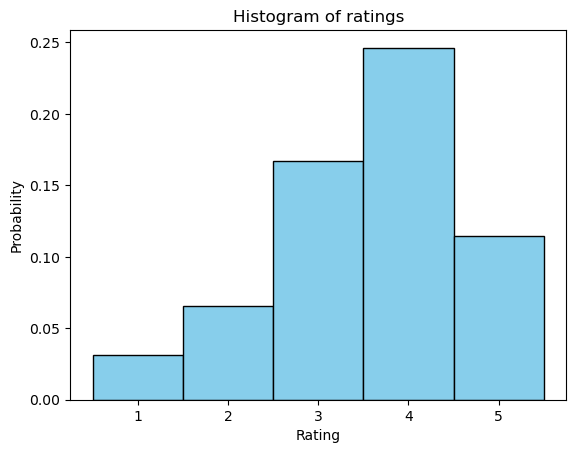

In [8]:
#code to plot a histogram of ratings. Include in the x axis the rating (1, 2, 3, 4, or 5) 
#and in the y axis the probability of having that rating. Remember to label both axes.

rating_range = [1, 2, 3, 4, 5]
count=ratings['rating'].count()#count elements in each range
probabilities = ratings['rating'].value_counts().reindex(rating_range)/count #compute the probability for each range
plt.bar(probabilities.index, probabilities.values, color='skyblue', edgecolor='black',width=1)
plt.xlabel('Rating')
plt.ylabel('Probability')
plt.title('Histogram of ratings')

plt.show()


<font size="+1" color="red">Replace this cell with your code to plot a boxplot of ratings. Look for outlier values. </font>

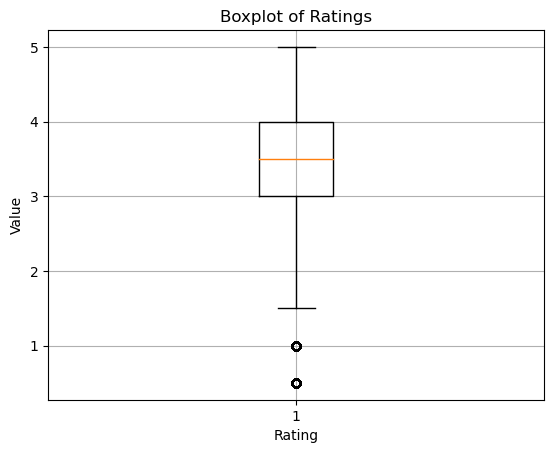

In [9]:
#code to plot a boxplot of ratings. Look for outlier values.

plt.boxplot(ratings['rating'])

plt.xlabel('Rating')
plt.ylabel('Value')
plt.title('Boxplot of Ratings')
plt.grid()
plt.show()
#I can observe to outlier values, one at value=1 and another one at value= 0.25 approximately, 
#because they are outside the limits of the box plot


<font size="+1" color="red">Replace this cell with a brief commentary on what you observe in the distribution of ratings.</font>

<font size="+1" color="blue">After analysing the histogram of ratings, I observe that the rating=4 is the most common one, and the one that is more commonly chose to rate a movie, 1 out of 4 times a movie receives this rating.</font>

<font size="+1" color="red">Replace this cell with code to print the 10 movies with the most "good" ratings (i.e., ratings that are larger than 4.5), and the 10 movies with the most "bad" ratings (i.e., ratings than are smaller than 1.5)</font>

In [10]:
#code to print the 10 movies with the most "good" ratings (i.e., ratings that are larger than 4.5), 
#and the 10 movies with the most "bad" ratings (i.e., ratings than are smaller than 1.5)
good_ratings={}#rating>4.0
bad_ratings={}#rating<2.0


for _,movie in ratings.iterrows():
    rate=movie["rating"]
    
    if rate >= 4.5:# if the rate is good count
        if movie["title"] in good_ratings:
            good_ratings[movie["title"]] += 1
        else:
            good_ratings[movie["title"]] = 1

    elif rate <= 1.5: # if rate is <1.5 count
        if movie["title"] in bad_ratings:
            bad_ratings[movie["title"]] += 1
        else:
            bad_ratings[movie["title"]] = 1



# We sort the dictionaries by the second column x[1]; the rating count

top_good_movies = sorted(good_ratings.items(), key=lambda x: x[1], reverse=True)[:10]
top_bad_movies = sorted(bad_ratings.items(), key=lambda x: x[1], reverse=True)[:10]

# Printing results
print("Top 10 movies with good ratings:")
for title, count in top_good_movies:
    print(f"{title}: {count}")

print("\nTop 10 movies with bad ratings:")
for title, count in top_bad_movies:
    print(f"{title}: {count}")

Top 10 movies with good ratings:
Lord of the Rings: The Fellowship of the Ring, The (2001): 3017
Lord of the Rings: The Return of the King, The (2003): 2792
Lord of the Rings: The Two Towers, The (2002): 2690
Memento (2000): 2184
Gladiator (2000): 1835
Amelie (Fabuleux destin d'AmÃ©lie Poulain, Le) (2001): 1801
Eternal Sunshine of the Spotless Mind (2004): 1711
Spirited Away (Sen to Chihiro no kamikakushi) (2001): 1378
Kill Bill: Vol. 1 (2003): 1360
Shrek (2001): 1311

Top 10 movies with bad ratings:
Charlie's Angels (2000): 338
Battlefield Earth (2000): 317
Scary Movie (2000): 296
Star Wars: Episode II - Attack of the Clones (2002): 274
Mission: Impossible II (2000): 244
American Pie 2 (2001): 227
Pearl Harbor (2001): 223
Lord of the Rings: The Fellowship of the Ring, The (2001): 223
Lord of the Rings: The Return of the King, The (2003): 223
Matrix Revolutions, The (2003): 214


<font size="+1" color="red">Replace this cell with a brief commentary on what you observe in these lists.</font>

<font size="+1" color="blue">After printing the top 10 movies with better and worse rating, I oberve that for the first group the movies the better rated are very popular ones as "The Lord of The Rings" and that it has created an extremely large number of fans due to its good plot and special effects. In contrast, the movies with the worst rate are those that did generate a lot of controvery as "Charlie's Angels" (after searching that the indexes of audiences dropped sharply)  </font>

## 2.2. Genres distribution

<font size="+1" color="red">Replace this cell with code to list all genres in the dataset. Verify the list has 20 genres with an assert, as follows:
    assert(n == 20).</font>

In [11]:
#code to list all genres in the dataset. Verify the list has 20 genres with an assert, as follows: assert(n == 20).
genres_unique=[]

for _,movie in movies.iterrows():
    genre = movie["genres"]
    genre = genre.split('|')
    for gen in genre:
        if gen not in genres_unique:
            genres_unique.append(gen)

for i in range(0,20):
    print(f"{i+1}: {genres_unique[i]}")

assert len(genres_unique) == 20, f"Expected 20 genres, but instead there are:{len(genres_unique)} genres"

    

1: Crime
2: Drama
3: Comedy
4: Adventure
5: Sci-Fi
6: Thriller
7: Romance
8: Horror
9: Mystery
10: Action
11: Animation
12: Children
13: Documentary
14: War
15: Musical
16: Western
17: Fantasy
18: IMAX
19: Film-Noir
20: (no genres listed)


<font size="+1" color="red">Replace this cell with code to obtain the frequency of each genre in the dataset, check that it returns the same result as above. Create a function that receives all relevant arguments and returns the dataframe (feel free to use auxiliary functions). Do not use global variables.</font>

In [12]:
#code to obtain the frequency of each genre in the dataset, check that it returns the same result as above. 
#Create a function that receives all relevant arguments and returns the dataframe (feel free to use auxiliary functions).

def freq_genres(dataframe,list_genres):
    #initialize the dictionary where I'll store the frequency of each genre, and set up each genre count to 0
    freq_genre={}
    for genre in list_genres:
        freq_genre[genre]=0
    #We iterate through the rows of the dataframe
    for _,rows in dataframe.iterrows():
        genre= rows["genres"]
        genre = genre.split('|')#differenciating the different genres that can appear in a same row
        for gen in genre:
            if gen in freq_genre:
                freq_genre[gen]+=1#update the counter (value of the dictionary)
                
    sorted_freq_genre=sorted(freq_genre.items(), key=lambda x: x[1], reverse=True) #sort items
    return sorted_freq_genre
            

freq={}

freq=freq_genres(movies, genres_unique)

#finally, print results
print("Results: \n")
i=0
for gen,count in freq:
    print(f"{i}: {gen} {count}")
    i+=1

Results: 

0: Drama 13666
1: Comedy 8898
2: Thriller 5437
3: Documentary 4473
4: Action 3901
5: Romance 3846
6: Horror 3431
7: Crime 2425
8: (no genres listed) 2200
9: Sci-Fi 1907
10: Adventure 1906
11: Children 1639
12: Animation 1553
13: Mystery 1516
14: Fantasy 1456
15: War 679
16: Musical 308
17: Western 194
18: IMAX 173
19: Film-Noir 21


<font size="+1" color="red">Replace this cell with code to produce two bar plots: one for movies filmed on 2005 or before, and another for movies filmed on 2016 or later.</font>

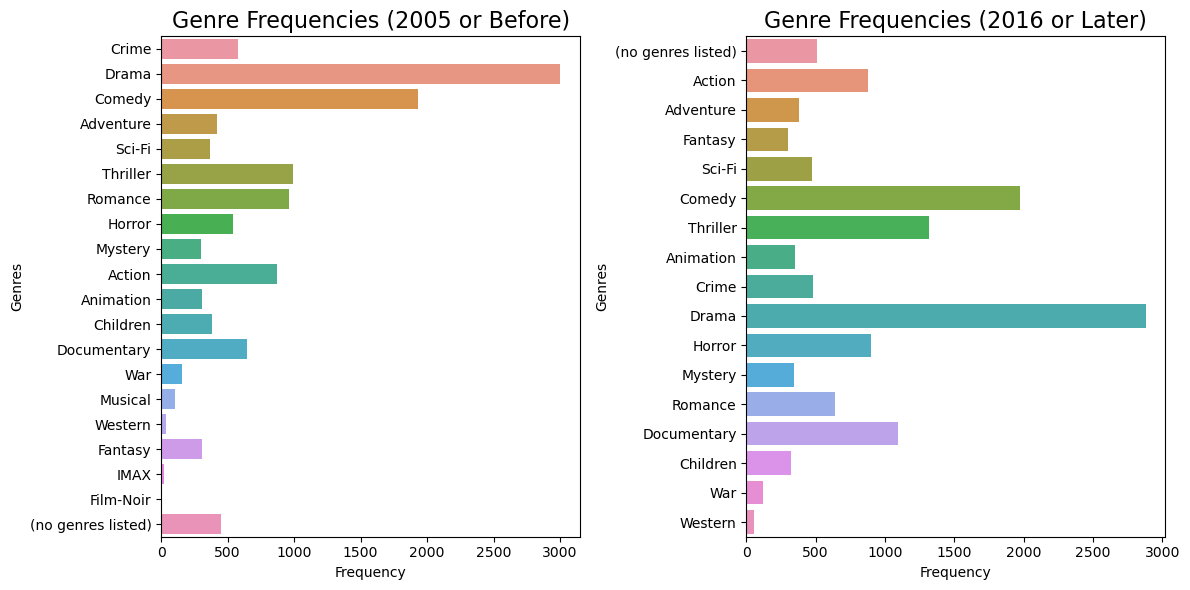

In [13]:
#code to produce two bar plots: one for movies filmed on 2005 or before, and another for movies filmed on 2016 or later.

#I create a function to count genres from a list of movies to avoid code repetition
def function_count_genres_from_list(list_genres):
    dictionary={}
    for gen in list_genres:
        if gen in dictionary:
            dictionary[gen] += 1
        else:
            dictionary[gen] = 1
    return dictionary
        
#lists to append correspoding genres
before_genres=[]
after_genres=[]
#check for the years of the movie
for _,movie in movies.iterrows():
    year=movie["year"]
    genre=movie["genres"].split("|")
    for gen in genre:
        if year <=2005:
            before_genres.append(gen)
        elif year >=2016:
             after_genres.append(gen)


#I create dictionaires now to store the frequencies for each genres                
before_freq = {}
after_freq = {}

before_freq= function_count_genres_from_list(before_genres)
after_freq= function_count_genres_from_list(after_genres)

#now we have to create the corresponding dataframes  because we have to use barplots
before_df = pd.DataFrame(before_freq.items(), columns=['Genre', 'Count'])
after_df = pd.DataFrame(after_freq.items(), columns=['Genre', 'Count'])

# Step 4: Create Bar Plots
plt.figure(figsize=(12, 6))

# Bar plot for movies before or in 2005
plt.subplot(1, 2, 1)
ax = sns.barplot(data=before_df, x='Count', y='Genre', orient='h')
ax.set_title('Genre Frequencies (2005 or Before)', fontsize=16)
ax.set_xlabel('Frequency', fontsize=10)
ax.set_ylabel('Genres', fontsize=10)

# Bar plot for movies after 2016
plt.subplot(1, 2, 2)
ax1 = sns.barplot(data=after_df, x='Count', y='Genre', orient='h')
ax1.set_title('Genre Frequencies (2016 or Later)', fontsize=16)
ax1.set_xlabel('Frequency', fontsize=10)
ax1.set_ylabel('Genres', fontsize=10)

plt.tight_layout()
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary comparing both distributions, including which genres changed popularity.</font>

<font size="+1" color="blue">I observe that before 2005 the most popular genres are drama and comedy, and all the otherones were moe or less equaly distributed. Concerning the barplot after 2016 still comedy and drama are the more common ones, but there's a notorious increase on the genre thiller movies and documentaries, likely to be with the arrival of new technologies, or simply because it is more common this format of movies.</font>

###### 3. Content-based recommendation

## 3.1. Compute TF-IDF vectors

<font size="+1" color="red">Replace this cell with your code to add column "genres_arr" to the dataframe "movies".</font>

In [14]:
#code to add column "genres_arr" to the dataframe "movies", for that I used the function split with the character that
#highlights the separation '|'
movies['genres_arr']=movies.apply(lambda x: x['genres'].split('|'), axis=1)#the df is movies, and we want to extract the genres from the column genre, and put it into an array
movies['genres_arr'] = movies['genres_arr'].apply(lambda x: '(no genres listed)' if x == ['(no genres listed)'] else x)#delete the 

movies['genres_arr'].fillna('').astype('str')
display(movies.head())

,movie_id,title,genres,year,genres_arr
0,2769,"Yards, The (2000)",Crime|Drama,2000.0,"[Crime, Drama]"
1,3177,Next Friday (2000),Comedy,2000.0,[Comedy]
2,3190,Supernova (2000),Adventure|Sci-Fi|Thriller,2000.0,"[Adventure, Sci-Fi, Thriller]"
3,3225,Down to You (2000),Comedy|Romance,2000.0,"[Comedy, Romance]"
4,3228,Wirey Spindell (2000),Comedy,2000.0,[Comedy]


In [15]:
# Leave this code as-is

print("Transformed: %s → %s" % (movies['genres'][3], movies['genres_arr'][3]))

Transformed: Comedy|Romance → ['Comedy', 'Romance']


In [16]:
# LEAVE AS-IS

# The reset-index is important to match row/column numbers in the tdifd-matrix

movies_filtered = movies[movies.year >= 2016]
movies_filtered = movies_filtered.reset_index()
display(movies_filtered.head(5))

,index,movie_id,title,genres,year,genres_arr
0,10897,122888,Ben-hur (2016),(no genres listed),2016.0,(no genres listed)
1,10898,122890,Warcraft (2016),Action|Adventure|Fantasy,2016.0,"[Action, Adventure, Fantasy]"
2,10900,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),2017.0,(no genres listed)
3,10901,122898,Justice League (2017),Action|Adventure|Sci-Fi,2017.0,"[Action, Adventure, Sci-Fi]"
4,10904,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,2016.0,"[Action, Adventure, Comedy, Sci-Fi]"


<font size="+1" color="red">Replace this cell with your code to generate "tfidf_matrix"</font>

In [17]:
#code to generate "tfidf_matrix"

tfidf_matrix=[]
vectorizer = TfidfVectorizer(ngram_range=(1,2),stop_words='english')#apply the functionTFidfVectorizer(), with stop_words parameter to get exacly 128 rows

tfidf_matrix = vectorizer.fit_transform(movies_filtered['genres'])

#printing dimensions
print("Shape of tfidf_matrix:",tfidf_matrix.shape)  # (7890, 128)

Shape of tfidf_matrix: (7890, 128)


## 3.2. Calculate most similar movies

In [18]:
# Leave this code as-is

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.         1.         ... 1.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [1.         0.         1.         ... 1.         0.         0.        ]
 ...
 [1.         0.         1.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.41022264]
 [0.         0.         0.         ... 0.         0.41022264 1.        ]]


In [19]:
# Leave this code as-is

# Create an index to convert from numbers to movie_id
movie_id_to_index = pd.Series(movies_filtered.index, index=movies_filtered['movie_id'])

# Print the similarity vector
def print_similarity_vector(movie_id, similarities):
    
    # Determine the index of the movie_id
    index_source = movie_id_to_index[movie_id]
    
    # Get the row in the similarities matrix
    sim_scores = list(similarities[index_source])

    # Iterate through that row
    for index_target in range(len(sim_scores)):
        print("%.3f %d %s" %
              (sim_scores[index_target], movies_filtered.iloc[index_target].movie_id, movies_filtered.iloc[index_target].title))
        
print_similarity_vector(122904, cosine_sim)

0.000 122888 Ben-hur (2016)
0.362 122890 Warcraft (2016)
0.000 122896 Pirates of the Caribbean: Dead Men Tell No Tales (2017)
0.600 122898 Justice League (2017)
1.000 122904 Deadpool (2016)
0.600 122906 Black Panther (2017)
0.600 122908 Inhumans (2018)
0.600 122910 Captain Marvel (2018)
0.600 122912 Avengers: Infinity War - Part I (2018)
0.600 122914 Avengers: Infinity War - Part II (2019)
0.600 122916 Thor: Ragnarok (2017)
0.600 122918 Guardians of the Galaxy 2 (2017)
0.359 122920 Captain America: Civil War (2016)
0.600 122922 Doctor Strange (2016)
0.504 122924 X-Men: Apocalypse (2016)
0.362 122926 Untitled Spider-Man Reboot (2017)
0.440 135141 Allegiant: Part 1 (2016)
0.000 135143 Fantastic Beasts and Where to Find Them (2016)
0.000 135426 Fantastic Beasts and Where to Find Them 2 (2018)
0.056 135436 The Secret Life of Pets (2016)
0.326 135530 Criminal (2016)
0.309 135536 Suicide Squad (2016)
0.600 135567 Independence Day: Resurgence (2016)
0.600 135569 Star Trek Beyond (2016)
0.000 

<font size="+1" color="red">Replace this cell with your code for "genre_content_based_recommendations"</font>

In [20]:
#code for "genre_content_based_recommendations"

#find the top-k most recommended movies for a given movie.
def genre_content_based_recommendations(movie_id, movies, similarities, num_movies=10):

    index_source = movie_id_to_index[movie_id]
    
    row_similarities = similarities[index_source]
    enumerated = list(enumerate(row_similarities))
    
    # Replace this comment with code to produce top_similarities
    #enumerated = list(enumerate(similarities))
    sorted_similarities = sorted(enumerated, key=lambda x: x[1], reverse=True)
    top_similarities = sorted_similarities[1:num_movies+1]     
    
    recommendations = []
    for (index_target, similarity) in top_similarities:
        
        # Replace this comment with code to obtain movie_id, title, genres
        movie_id = movies.iloc[index_target]['movie_id']  # Access movie_id
        title = movies.iloc[index_target]['title']               # Access title
        genres = movies.iloc[index_target]['genres_arr']
        
        recommendations.append({
                'movie_id': movie_id,
                'title': title,
                'genres': genres,
                'similarity': similarity
            }
        )
    
    return pd.DataFrame.from_records(recommendations, columns=['similarity', 'movie_id', 'title', 'genres'])

<font size="+1" color="red">Replace this cell with code to print the top 10 recommendations for movie "Pirates of the Caribbean" (movie_id=122896) and "Midsommer" (movie_id=201646).</font>

In [21]:
#code to print the top 10 recommendations for movie "Pirates of the Caribbean" (movie_id=122896) 
#and "Midsommer" (movie_id=201646).
movie_id1 = 122896  # movie "Pirates of the Caribbean"
movie_id2 = 201646  # movie "Midsommer"
num_movies = 10

recommendations1 = genre_content_based_recommendations(movie_id1, movies, cosine_sim, num_movies)
recommendations2 = genre_content_based_recommendations(movie_id2, movies, cosine_sim, num_movies)

print("Top 10 recommendations for 'Pirates of the Caribbean':")
print(recommendations1['title'])
print("\nTop 10 recommendations for 'Midsommer':")
print(recommendations2['title'])

Top 10 recommendations for 'Pirates of the Caribbean':
0                                     Supernova (2000)
1    Black Tar Heroin: The Dark End of the Street (...
2                               Mission to Mars (2000)
3                             Final Destination (2000)
4                               Ready to Rumble (2000)
5                                         U-571 (2000)
6                    Jails, Hospitals & Hip-Hop (2000)
7                                  Center Stage (2000)
8                            Me, Myself & Irene (2000)
9                                  Saving Grace (2000)
Name: title, dtype: object

Top 10 recommendations for 'Midsommer':
0                                    Rollerball (2002)
1                             Trouble Every Day (2001)
2                                Emerald Cowboy (2002)
3    Edge of Heaven, The (Auf der anderen Seite) (2...
4                               ParaÃ­so Travel (2008)
5                                Other Man, The (200

<font size="+1" color="red">Replace this cell with code to get the list of recommendation for three movies you are familiar with. Indicate the **precision** of each list, which is the percentage of recommended movies that *you* consider relevant (mark manually as "relevant" or "irrelevant" each recommendation). Indicate the **average precision** across the three lists.</font> 

In [22]:
#code to get the list of recommendation for three movies you are familiar with. Indicate the precision of each list, 
#which is the percentage of recommended movies that you consider relevant 
#(mark manually as "relevant" or "irrelevant" each recommendation). Indicate the average precision across the three lists.


movies_familiar=['Deadpool (2016)','Star Wars: The Last Jedi (2017)','Solo: A Star Wars Story (2018)']
precision_results = []

#I've marked as relavant or irrelevant the different movies in the same order as they appear in the list
#I search them because I didn't know the majority of them.
#After knowing better, I've marked as relevant those that are related in my opinion.
#That means, that the precision will vary on how I do the choose.

#matrix relevant list
relevance_matrix=[['irrelevant','relevant','irrelevant','irrelevant','irrelevant','irrelevant','relevant','irrelevant','irrelevant','relevant'],
['irrelevant','irrelevant','irrelevant','irrelevant','irrelevant','irrelevant','irrelevant','irrelevant','irrelevant','irrelevant'],
['irrelevant','irrelevant','irrelevant','relevant','irrelevant','relevant','irrelevant','irrelevant','irrelevant','irrelevant']]

#compute the precision for each movie
for i in range(3):
    relevant_count=0
    for mark in relevance_matrix[i]:
        if mark=='relevant':
            relevant_count+=1
    total_count = len(relevance_matrix[i])
    if total_count !=0:
        precision = (relevant_count / total_count) * 100
    else:
        precision=0
    precision_results.append(precision)
    
#print the list of recommendationf for each movie
i=0
for title in movies_familiar:
    movie_id = movies.loc[movies['title'] == title].values[0][0]
    list_rec=genre_content_based_recommendations(movie_id, movies, cosine_sim, num_movies=10)
    print(f"List of recommendations for: {movies_familiar[i]}: \n",list_rec['title'])
    i+=1

#print the precision for each movie
print("\nPrecision for each movie:")
j=0
while(j<3):
    print(f"movie: {movies_familiar[j]}, with precision: {precision_results[j]} %\n")
    j+=1
    

#finally I print the average precision
if precision_results:
    average_precision = sum(precision_results) / len(precision_results) 
else:
    average_precision=0
print(f"\nAverage Precision of all movies: {average_precision:.2f}%")

List of recommendations for: Deadpool (2016): 
 0                              Beautiful Ohio (2006)
1    Assassination of a High School President (2008)
2             Psyhi vathia (a.k.a. Deep Soul) (2009)
3                                Bag of Bones (2011)
4                           Big Bad Swim, The (2006)
5    Thirty-Five Something (Tout pour plaire) (2005)
6               South of Heaven, West of Hell (2000)
7                          Quitting (Zuotian) (2001)
8                               Desert Saints (2002)
9                                   King Kong (2005)
Name: title, dtype: object
List of recommendations for: Star Wars: The Last Jedi (2017): 
 0        Next Best Thing, The (2000)
1               Here on Earth (2000)
2                      Joshua (2002)
3              Owning Mahowny (2003)
4                    Accepted (2006)
5    Day Without a Mexican, A (2004)
6               Beautiful Boy (2010)
7                 Next Friday (2000)
8                  Hanging Up (2000

<font size="+1" color="red">Replace this cell with ideas on how you would improve **this** content-based recommendations, based on what we discussed in class about content-based recommendations.</font>

<font size="+1" color="blue">Observing the results obtained above, I definately think that modifying the method of the content-based recommendations we could achieve a better precision. For example, as we saw in class, we could recommend movies from the same category, for example if it's a saga it could recommend those movies. Also movies that have the same director (because its more likely that a director have more movies from similar genres, than having from different genres) or same actors.</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>